In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

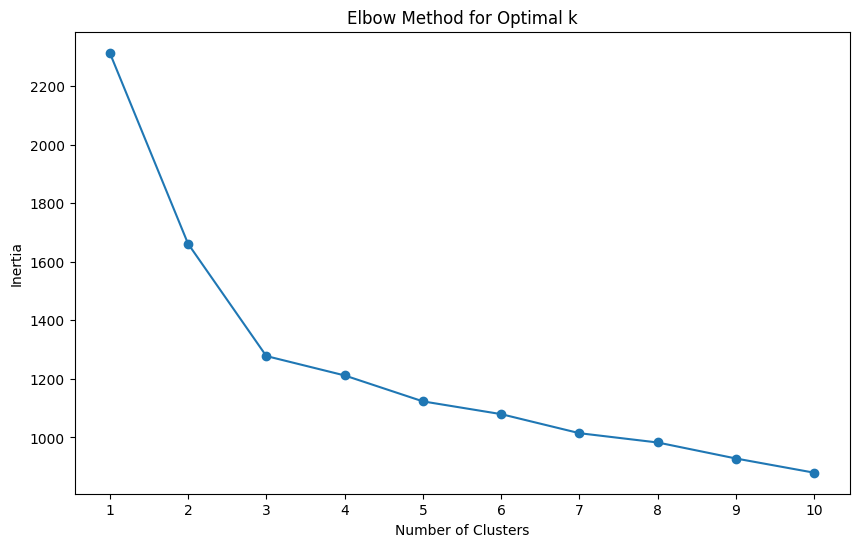

Silhouette Score: 0.285
Adjusted Rand Index: 0.897
Normalized Mutual Info: 0.876


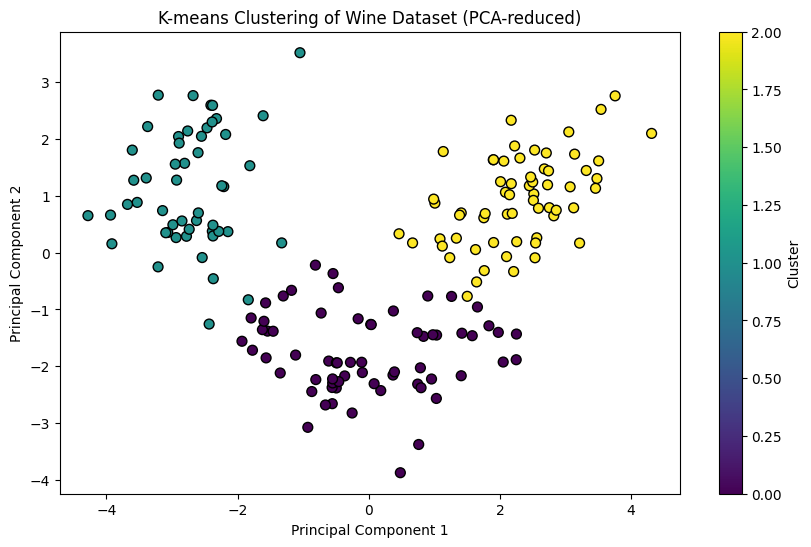


Cluster Characteristics (Mean Values):
         alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
Cluster                                                            
0          12.25        1.90  2.23              20.06      92.74   
1          13.13        3.31  2.42              21.24      98.67   
2          13.68        2.00  2.47              17.46     107.97   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0                 2.25        2.05                  0.36             1.62   
1                 1.68        0.82                  0.45             1.15   
2                 2.85        3.00                  0.29             1.92   

         color_intensity   hue  od280/od315_of_diluted_wines  proline  
Cluster                                                                
0                   2.97  1.06                          2.80   510.17  
1                

In [9]:
wine = datasets.load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y, clusters):.3f}")
print(f"Normalized Mutual Info: {normalized_mutual_info_score(y, clusters):.3f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering of Wine Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

cluster_df = pd.DataFrame(X, columns=feature_names)
cluster_df['Cluster'] = clusters

print("\nCluster Characteristics (Mean Values):")
print(cluster_df.groupby('Cluster').mean().round(2))
